In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from scope.utils import read_parquet
from scope.utils import read_hdf

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
field_preds_dnn = read_parquet('') #insert string filepath to dnn preds
field_preds_xgb = read_parquet('') #insert string filepath to xgb preds
training_set = read_parquet('') #insert string filepath to training set

In [4]:
n_lightcurves = len(training_set)

classifications = [] # create a list of the 44 classifications in alphabetical order
for entry in field_preds_dnn.columns:
    if '_dnn' in entry:
        classifications.append(entry.replace('_dnn',''))
classifications.sort()
classifications

['agn',
 'bis',
 'blend',
 'blher',
 'blyr',
 'bogus',
 'bright',
 'ceph',
 'ceph2',
 'cv',
 'dip',
 'dp',
 'dscu',
 'e',
 'ea',
 'eb',
 'el',
 'emsms',
 'ew',
 'ext',
 'fla',
 'hp',
 'i',
 'longt',
 'lpv',
 'mir',
 'mp',
 'osarg',
 'pnp',
 'puls',
 'rrab',
 'rrblz',
 'rrc',
 'rrd',
 'rrlyr',
 'rscvn',
 'saw',
 'sin',
 'srv',
 'vnv',
 'wp',
 'wuma',
 'wvir',
 'yso']

In [5]:
train_cols = [] #list of training set column names
for column in training_set.columns:
    train_cols.append(column)
    
while len(train_cols) > 53: #loop to remove column names that don't correspond to classifications (e.g. ID column, features)
    train_cols.pop(0) #this works for the particular training file I was working with since the classifications were the last 53 columns

train_cols

['variable',
 'YSO',
 'periodic',
 'pulsator',
 'RR Lyrae',
 'Cepheid',
 'multi periodic',
 'sinusoidal',
 'non-variable',
 'bogus',
 'bright star',
 'long timescale',
 'irregular',
 'blend',
 'extended',
 'eclipsing',
 'EW',
 'flaring',
 'ccd artifact',
 'binary star',
 'detached eclipsing MS-MS',
 'W UMa',
 'RR Lyrae ab',
 'RR Lyrae c',
 'Delta Scu',
 'RR Lyrae d',
 'Cepheid type-II',
 'RS CVn',
 'EB',
 'Beta Lyr',
 'sawtooth',
 'RR Lyrae Blazhko',
 'EA',
 'dipping',
 'wrong period',
 'double period',
 'AGN',
 'RV Tau',
 'LPV',
 'Mira',
 'half period',
 'SRV',
 'W Virginis',
 'compact binary',
 'eclipsing WD+dM (NN Ser)',
 'F',
 'O',
 'BL Her',
 'OSARG',
 'eclipsing sdB+dM (HW Vir)',
 'ellipsoidal',
 'Redback pulsar',
 'CV']

In [6]:
counts_train = {} #dictionary w classifications as keys and num of sources > certain probability threshold as values
threshold = 0.7 #enter chosen threshold for positive classification

for column in train_cols:
    count = np.count_nonzero(training_set[column] > threshold)
    counts_train[column] = count
    
counts_train

{'variable': 125056,
 'YSO': 4108,
 'periodic': 107248,
 'pulsator': 26603,
 'RR Lyrae': 14917,
 'Cepheid': 1573,
 'multi periodic': 257,
 'sinusoidal': 2645,
 'non-variable': 45212,
 'bogus': 1640,
 'bright star': 106,
 'long timescale': 3961,
 'irregular': 5970,
 'blend': 360,
 'extended': 154,
 'eclipsing': 75049,
 'EW': 55251,
 'flaring': 4633,
 'ccd artifact': 18,
 'binary star': 66607,
 'detached eclipsing MS-MS': 5199,
 'W UMa': 55253,
 'RR Lyrae ab': 4293,
 'RR Lyrae c': 6251,
 'Delta Scu': 6475,
 'RR Lyrae d': 539,
 'Cepheid type-II': 281,
 'RS CVn': 1593,
 'EB': 3130,
 'Beta Lyr': 3017,
 'sawtooth': 1314,
 'RR Lyrae Blazhko': 85,
 'EA': 2073,
 'dipping': 64,
 'wrong period': 1694,
 'double period': 238,
 'AGN': 596,
 'RV Tau': 9,
 'LPV': 3359,
 'Mira': 248,
 'half period': 237,
 'SRV': 950,
 'W Virginis': 77,
 'compact binary': 18,
 'eclipsing WD+dM (NN Ser)': 10,
 'F': 19,
 'O': 6,
 'BL Her': 95,
 'OSARG': 2061,
 'eclipsing sdB+dM (HW Vir)': 7,
 'ellipsoidal': 931,
 'Redback

In [7]:
#this cell creates a dataframe from counts_train and reformats it to include only the 44 classifications with their standard abbreviations
counts_train_table = pd.DataFrame.from_dict(counts_train, orient = 'index', columns = ['count'])
counts_train_table = counts_train_table.drop(['non-variable', 'ccd artifact', 'RV Tau', 'compact binary', 'eclipsing WD+dM (NN Ser)', 'eclipsing sdB+dM (HW Vir)', 'F', 'O', 'Redback pulsar'])
counts_train_table = counts_train_table.reset_index(names = 'classification')
counts_train_table['classification'] = counts_train_table['classification'].map(lambda name: name.lower())
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table = counts_train_table.replace('binary star', 'bis').replace('beta lyr', 'blyr').replace('bl her', 'blher').replace('bright star', 'bright').replace('cepheid', 'ceph').replace('cepheid type-ii', 'ceph2').replace('delta scu', 'dscu').replace('detached eclipsing ms-ms', 'emsms').replace('dipping', 'dip').replace('double period', 'dp').replace('eclipsing', 'e').replace('ellipsoidal', 'el').replace('extended', 'ext').replace('flaring', 'fla').replace('half period', 'hp').replace('irregular', 'i').replace('long timescale', 'longt').replace('mira', 'mir').replace('multi periodic', 'mp').replace('periodic', 'pnp').replace('pulsator', 'puls').replace('rr lyrae ab', 'rrab').replace('rr lyrae blazhko', 'rrblz').replace('rr lyrae c', 'rrc').replace('rr lyrae d', 'rrd').replace('rr lyrae', 'rrlyr').replace('rs cvn', 'rscvn').replace('sawtooth', 'saw').replace('sinusoidal', 'sin').replace('variable', 'vnv').replace('wrong period', 'wp').replace('w uma', 'wuma').replace('w virginis', 'wvir')
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table

,classification,count
0,agn,596
1,bis,66607
2,blend,360
3,blher,95
4,blyr,3017
5,bogus,1640
6,bright,106
7,ceph,1573
8,ceph2,281
9,cv,4435


In [8]:
def hist_plot(classif): #function to make histogram of dnn vs xgb predictions for a particular classification
    classif_dnn = field_preds_dnn[classif + '_dnn']
    classif_xgb = field_preds_xgb[classif + '_xgb']
    plot = plt.hist(classif_dnn, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'dnn') + plt.hist(classif_xgb, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'xgb', log=True)
    plt.legend()
    plt.xlabel(classif + ' Classification Probability')
    plt.ylabel('Number of Sources')

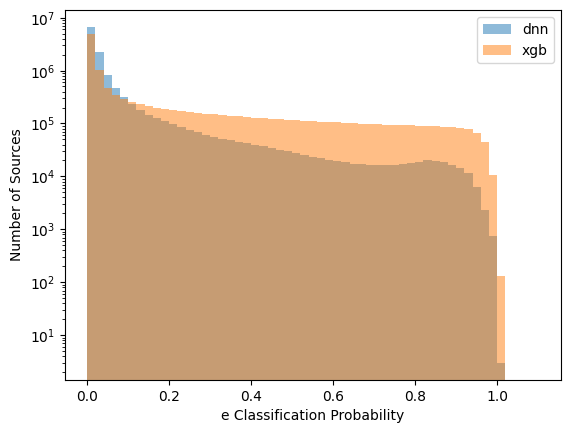

In [9]:
hist_plot('e') #input whichever classification you want
#adjust plot as desired, for example plt.yscale('log') to get logarithmic scale

In [ ]:
#new dataframe containing dnn AND xgb preds
dnn_xgb_preds = pd.merge(field_preds_dnn, field_preds_xgb, on = '_id')

In [ ]:
#function to make a scatter plot comparing dnn and xgb predictions, with agreement stat
def class_compare(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    plt.scatter(table['dnn'], table['xgb'], alpha = 0.01)
    plt.xlabel('dnn probability')
    plt.ylabel('xgb probability')
    plt.plot([threshold, threshold], [0,1], color = 'orange')
    plt.plot([0,1], [threshold, threshold], color = 'orange')
    table['new'] = np.where(((table['dnn'] < threshold) & (table['xgb'] < threshold)) | ((table['dnn'] >= threshold) & (table['xgb'] >= threshold)), 'Agree', 'Disagree')
    
    count_agree = 0
    for row in table['new']:
        if row == 'Agree':
            count_agree += 1
    agreement = np.round(count_agree / len(dnn_xgb_preds), 2)
    
    plt.suptitle(classif + ' predictions, DNN vs. XGB')
    plt.title(f'fractional agreement = {agreement}')
    plt.tight_layout()

In [ ]:
#function to compare dnn and xgb preds in a 2d histogram/heat map
def heatmap(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    table['new'] = np.where(((table['dnn'] < threshold) & (table['xgb'] < threshold)) | ((table['dnn'] >= threshold) & (table['xgb'] >= threshold)), 'Agree', 'Disagree')

    fig = plt.figure(figsize=(6,4.5))
    heat_plot = plt.hist2d(table['dnn'], table['xgb'], bins = [np.arange(0,1.05,1/20), np.arange(0,1.05,1/20)], norm = mpl.colors.LogNorm(vmin=1, vmax=len(dnn_xgb_preds)), cmap = mpl.cm.Oranges)
    plt.xlabel('DNN probability', fontsize=16)
    plt.ylabel('XGB probability', fontsize=16)
    plt.text(.05,.9, classif, fontsize=18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.tight_layout()
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Number of light curves', size=16)
    
    count_agree = 0
    for row in table['new']:
        if row == 'Agree':
            count_agree += 1
    agreement = np.round(count_agree / len(dnn_xgb_preds), 2)
    
    return fig, agreement

In [ ]:
fig, agreement = heatmap('e')

In [ ]:
import json
import glob

First, run `scope.py assemble_training_stats` for DNN and XGB algorithms to group training stats together. Then, continue with the cells below.

In [ ]:
# DNN training scores
dnn_stats_train = {} #dictionary with classifications as keys and dnn CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/dnn_stats_train/{classif}.*stats.json')
    with open(file[0]) as classif_stats: #change to appropriate filepath
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        dnn_stats_train.update(new)

In [ ]:
# DNN test scores
dnn_stats = {} #dictionary with classifications as keys and dnn CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/dnn_stats/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        dnn_stats.update(new)

In [ ]:
# XGB training scores
xgb_stats_train = {} #dictionary with classifications as keys and xgb CM stats as values 
for classif in classifications:  
    file = glob.glob(f'/Users/bhealy/scope/xgb_stats_train/{classif}.*stats.json')
    with open(file[0]) as classif_stats: #change to appropriate filepath
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        xgb_stats_train.update(new)

In [ ]:
# XGB test scores
xgb_stats = {} #dictionary with classifications as keys and xgb CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/xgb_stats/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        xgb_stats.update(new)

In [ ]:
#dataframes of training confusion matrix stats (accuracy, precision, recall, f1 score, ROC area)
stats_dnn_train = pd.DataFrame.from_dict(dnn_stats_train, orient = 'index')
stats_xgb_train = pd.DataFrame.from_dict(xgb_stats_train, orient = 'index')

#dataframes of test confusion matrix stats (accuracy, precision, recall, f1 score, ROC area)
stats_dnn = pd.DataFrame.from_dict(dnn_stats, orient = 'index')
stats_xgb = pd.DataFrame.from_dict(xgb_stats, orient = 'index')

In [ ]:
# If DNN and XGB fail to identify any true positives, drop from stats
drop_list = []
for cls in stats_dnn.index:
    dnn_rec = stats_dnn.loc[cls, 'recall']
    if dnn_rec == 0:
        try:
            xgb_rec = stats_xgb.loc[cls, 'recall']
            if xgb_rec == 0:
                drop_list.append(cls)
        except KeyError:
            continue     

In [ ]:
target_scores = ['precision', 'recall']

#dataframe of dnn training precision and recall, sorted by num pos examples in training set
dnn_prec_rec_train = stats_dnn_train[target_scores]
dnn_prec_rec_train = dnn_prec_rec_train.drop(drop_list) 

#dataframe of dnn test precision and recall, sorted by num pos examples in training set
dnn_prec_rec = stats_dnn[target_scores]
dnn_prec_rec = dnn_prec_rec.drop(drop_list) 

#dataframe of xgb training precision and recall, sorted by num pos examples in training set
xgb_prec_rec_train = stats_xgb_train[target_scores]
xgb_prec_rec_train = xgb_prec_rec_train.drop(drop_list) 

#dataframe of xgb test precision and recall, sorted by num pos examples in training set
xgb_prec_rec = stats_xgb[target_scores]
xgb_prec_rec = xgb_prec_rec.drop(drop_list)

In [ ]:
# Inner-joined training set precision/recall scores
mrg_prec_rec_train = dnn_prec_rec_train.join(xgb_prec_rec_train, how='inner', lsuffix='_dnn', rsuffix='_xgb')
mrg_prec_rec_train = mrg_prec_rec_train.reset_index().rename({'index': 'classification'}, axis=1)
mrg_prec_rec_train = pd.merge(counts_train_table, mrg_prec_rec_train, on='classification')
mrg_prec_rec_train.set_index('classification', inplace=True)
mrg_prec_rec_train.sort_values('count', ascending=False, inplace=True)


In [ ]:
# Inner-joined test set precision/recall scores
mrg_prec_rec = dnn_prec_rec.join(xgb_prec_rec, how='inner', lsuffix='_dnn', rsuffix='_xgb')
mrg_prec_rec = mrg_prec_rec.reset_index().rename({'index': 'classification'}, axis=1)
mrg_prec_rec = pd.merge(counts_train_table, mrg_prec_rec, on='classification')
mrg_prec_rec.set_index('classification', inplace=True)
mrg_prec_rec.sort_values('count', ascending=False, inplace=True)


In [ ]:
# Outer-joined train set precision/recall scores
resultsTable_train = dnn_prec_rec_train.join(xgb_prec_rec_train, how='outer', lsuffix='_dnn', rsuffix='_xgb')
resultsTable_train = resultsTable_train.reset_index().rename({'index': 'classification'}, axis=1)
resultsTable_train = pd.merge(counts_train_table, resultsTable_train, on='classification')
resultsTable_train.sort_values('count', ascending=False, inplace=True)
resultsTable_train.set_index('classification', inplace=True)


In [ ]:
# Outer-joined test set precision/recall scores
resultsTable = dnn_prec_rec.join(xgb_prec_rec, how='outer', lsuffix='_dnn', rsuffix='_xgb')
resultsTable = resultsTable.reset_index().rename({'index': 'classification'}, axis=1)
resultsTable = pd.merge(counts_train_table, resultsTable, on='classification')
resultsTable.sort_values('count', ascending=False, inplace=True)
resultsTable.set_index('classification', inplace=True)

classifications_subset = resultsTable.index

resultsTable

In [ ]:
# Plot number of positive training examples
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.bar(x = 'classification', y = 'count', figsize = (15,5), legend = None, ax=ax, color='slategray')
plt.yscale('log')
plt.ylabel('log(N positive)', fontsize=18)
plt.xlabel('Classification', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()


In [ ]:
feature_importances = {} #dictionary with classifications as keys and xgb feature importance dicts as values
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/xgb_feature_importance/{classif}.*impvars.json')
    with open(file[0]) as importance: #change to appropriate filepath
        importance = importance.read()
        importance = json.loads(importance)
        new = {classif: importance}
        feature_importances.update(new)

In [ ]:
most_important_features = []
for classif in classifications_subset:
    importance = feature_importances[classif]
    features = [x for x in importance.keys()]
    f_scores = [x for x in importance.values()]
    max_f_index = np.argmax(f_scores)
    most_important_feature = features[max_f_index]
    most_important_features.append(most_important_feature)
    
counter = Counter(most_important_features)
most_common = counter.most_common()[::-1]

names = [x[0] for x in most_common]
frequencies = [x[1] for x in most_common]

In [ ]:
featfig = plt.figure()
plt.barh(names, frequencies, color='navy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel('Number of classifiers', fontsize=14)
plt.ylabel('Most important feature', fontsize=14)
plt.xlim(0,16)
plt.tight_layout()


In [ ]:
topN = 3
most_important_features_all = []
for classif in classifications_subset:
    importance = feature_importances[classif]
    features = np.array([x for x in importance.keys()])
    f_scores = np.array([x for x in importance.values()])
    sorted_args = np.argsort(f_scores)[::-1]
    most_important_features = features[sorted_args[:topN]]
    most_important_features_all.append(most_important_features.tolist())

counter_all = Counter([x for y in most_important_features_all for x in y])
most_common_all = counter_all.most_common()[::-1]

names_all = [x[0] for x in most_common_all]
frequencies_all = [x[1] for x in most_common_all]

In [ ]:
# Instead of counting the single most important feature,
# we count the top 3 for each classifier and plot them below:

featfig_all = plt.figure(figsize=(10, 8))

plt.barh(names_all, frequencies_all, color='navy')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.tight_layout()


In [ ]:
# phenom classifiers only
phenom_classifications = ['blend', 'bogus', 'bright', 'dip', 'dp', 'e', 'ea', 'eb', 'el', 'ew', 'ext,'\
                          'fla', 'hp', 'i', 'longt', 'mp', 'pnp', 'saw', 'sin', 'vnv', 'wp']

topN = 3
most_important_features_phenom = []
for classif in classifications_subset:
    if classif in ['vnv', 'pnp', 'e', 'ew', 'i', 'fla', 'longt', 'eb', 'sin', 'ea', 'bogus', 'saw', 'blend', 'ext']:
        importance_phenom = feature_importances[classif]
        features_phenom = np.array([x for x in importance_phenom.keys()])
        f_scores_phenom = np.array([x for x in importance_phenom.values()])
        sorted_args_phenom = np.argsort(f_scores_phenom)[::-1]
        most_important_features = features_phenom[sorted_args_phenom[:topN]]
        most_important_features_phenom.append(most_important_features.tolist())

counter_phenom = Counter([x for y in most_important_features_phenom for x in y])
most_common_phenom = counter_phenom.most_common()[::-1]

names_phenom = [x[0] for x in most_common_phenom]
frequencies_phenom = [x[1] for x in most_common_phenom]

In [ ]:
featfig_phenom = plt.figure(figsize=(9, 6))

plt.barh(names_phenom, frequencies_phenom, color='navy')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.text(7,0.1, 'phenom. classifiers', fontsize=14)
plt.tight_layout()


In [ ]:
# ontol classifiers only
topN = 3
most_important_features_ontol = []
for classif in classifications_subset:
    if classif not in phenom_classifications:
        importance_ontol = feature_importances[classif]
        features_ontol = np.array([x for x in importance_ontol.keys()])
        f_scores_ontol = np.array([x for x in importance_ontol.values()])
        sorted_args_ontol = np.argsort(f_scores_ontol)[::-1]
        most_important_features = features_ontol[sorted_args_ontol[:topN]]
        most_important_features_ontol.append(most_important_features.tolist())

counter_ontol = Counter([x for y in most_important_features_ontol for x in y])
most_common_ontol = counter_ontol.most_common()[::-1]

names_ontol = [x[0] for x in most_common_ontol]
frequencies_ontol = [x[1] for x in most_common_ontol]

In [ ]:
featfig_ontol = plt.figure(figsize=(9, 6))

plt.barh(names_ontol, frequencies_ontol, color='maroon')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.text(8.5,0.1, 'ontol. classifiers', fontsize=14)
plt.tight_layout()


In [ ]:
#dnn precision and recall plot
dnnPrecRecFig = plt.figure(figsize=(15,7))
ax = dnnPrecRecFig.add_subplot()
resultsTable[['precision_dnn', 'recall_dnn']].rename({'precision_dnn':'precision', 'recall_dnn':'recall'}, axis=1).plot.bar(figsize = (15,7), ax=ax)

plt.xticks(rotation = 52, fontsize = 18)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('DNN classifier',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.ylim(0,1.12)
plt.tight_layout()


In [ ]:
#xgb precision and recall plot
xgbPrecRecFig = plt.figure(figsize=(15,7))
ax = xgbPrecRecFig.add_subplot()
resultsTable[['precision_xgb', 'recall_xgb']].rename({'precision_xgb':'precision', 'recall_xgb':'recall'}, axis=1).plot.bar(figsize = (15,7), ax=ax)

plt.xticks(rotation = 52, fontsize = 18)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('XGB classifier',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.ylim(0,1.12)
plt.tight_layout()


In [ ]:
# Plot difference between DNN test and training precision/recall scores
dnnDiffFig = plt.figure(figsize=(15,5))

for cls in resultsTable.index:
    train_precision = resultsTable_train.loc[cls, 'precision_dnn']
    train_recall = resultsTable_train.loc[cls, 'recall_dnn']
    test_precision = resultsTable.loc[cls, 'precision_dnn']
    test_recall = resultsTable.loc[cls, 'recall_dnn']
        
    if cls == resultsTable.index[-1]:
        break
        
    elif not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
        plt.scatter(cls, test_precision - train_precision, color=colors[0], s=120, zorder=1)
        plt.scatter(cls, test_recall - train_recall, color=colors[1], s=100, marker='s', zorder=0)
    else:
        plt.scatter(cls, 999)
    
if not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
    plt.scatter(cls, test_precision - train_precision, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, test_recall - train_recall, color=colors[1], label='recall', s=100, marker='s', zorder=0)
else:
    plt.scatter(cls, 999, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, 999, color=colors[1], label='recall', s=120, zorder=0)
    
plt.xticks(rotation = 55, fontsize = 17)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 17)
plt.xlabel('DNN classifier',fontsize=18)
plt.ylabel('Test - Train Score Difference', fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-0.85, 0.3)
plt.tight_layout()


In [ ]:
# Plot difference between XGB test and training precision/recall scores
xgbDiffFig = plt.figure(figsize=(15,5))

for cls in resultsTable.index:
    train_precision = resultsTable_train.loc[cls, 'precision_xgb']
    train_recall = resultsTable_train.loc[cls, 'recall_xgb']
    test_precision = resultsTable.loc[cls, 'precision_xgb']
    test_recall = resultsTable.loc[cls, 'recall_xgb']
    
    if cls == resultsTable.index[-1]:
        break
        
    elif not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
        plt.scatter(cls, test_precision - train_precision, color=colors[0], s=120, zorder=1)
        plt.scatter(cls, test_recall - train_recall, color=colors[1], s=100, marker='s', zorder=0)
    else:
        plt.scatter(cls, 999)
    
if not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
    plt.scatter(cls, test_precision - train_precision, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, test_recall - train_recall, color=colors[1], label='recall', s=100, marker='s', zorder=0)
else:
    plt.scatter(cls, 999, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, 999, color=colors[1], label='recall', s=120, zorder=0)

plt.xticks(rotation = 55, fontsize = 17)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 17)
plt.xlabel('XGB classifier',fontsize=18)
plt.ylabel('Test - Train Score Difference', fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-0.85, 0.3)
plt.tight_layout()


In [ ]:
# Scatter plot of DNN/XGB precision, color-coded by number of positive examples
# Intended to be paired with the recall scatter plot below
pscatter_count = plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.scatter(mrg_prec_rec['precision_dnn'], mrg_prec_rec['precision_xgb'], c=np.log10(mrg_prec_rec['count']))
plt.xlabel('DNN precision',fontsize=14)
plt.ylabel('XGB precision',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


In [ ]:
# Scatter plot of DNN/XGB recall, color-coded by number of positive examples (with colorbar)
rscatter_count = plt.figure(figsize=(6,5))
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.scatter(mrg_prec_rec['recall_dnn'], mrg_prec_rec['recall_xgb'], c=np.log10(mrg_prec_rec['count']))
cbar = plt.colorbar(label='log(count)')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$\log_{10}$(count)', size=14)
plt.xlabel('DNN recall',fontsize=14)
plt.ylabel('XGB recall',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


In [ ]:
# Number of positive examples given to each XGB classifier vs precision and recall scores
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'count', y = 'precision_xgb', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'count', y = 'recall_xgb', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('log(N positive)', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

In [ ]:
# Number of positive examples given to each DNN classifier vs precision and recall scores
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'count', y = 'precision_dnn', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'count', y = 'recall_dnn', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('log(N positive)', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

In [ ]:
#fraction of positive examples vs XGB precision and recall scores
resultsTable['fraction'] = resultsTable['count']/n_lightcurves

countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'precision_xgb', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'recall_xgb', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('N positive / N lightcurves', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

In [ ]:
#fraction of positive examples vs DNN precision and recall scores
resultsTable['fraction'] = resultsTable['count']/n_lightcurves

countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'precision_dnn', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'recall_dnn', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('N positive / N lightcurves', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()